## Basic data filtering and columns normalization

In [1]:
import pandas as pd
import re
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import datetime, timedelta
# Since our dataset is very big and with many columns we activate this option to show all columns
pd.set_option('display.max_columns', 100)

warnings.filterwarnings("ignore")
dataset = pd.read_csv('C:\\Users\\VideoMachine\\IH-labs\\Fire-Project\\NEW_DATA\\ICNF_2013_2022_full.csv') 

In [2]:
dataset.head()

,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,NCCO,NOMECCO,DATAALERTA,HORAALERTA,LOCAL,CONCELHO,FREGUESIA,FONTEALERTA,INE,X,Y,DIA,MES,HORA,OPERADOR,PERIMETRO,APS,CAUSA,TIPOCAUSA,DHINICIO,DHFIM,DURACAO,HAHORA,DATAEXTINCAO,HORAEXTINCAO,DATA1INTERVENCAO,HORA1INTERVENCAO,QUEIMA,LAT,LON,CAUSAFAMILIA,TEMPERATURA,HUMIDADERELATIVA,VENTOINTENSIDADE,VENTOINTENSIDADE_VETOR,VENTODIRECAO_VETOR,PRECEPITACAO,FFMC,DMC,DC,ISI,BUI,FWI,DSR,THC,MODFARSITE,ALTITUDEMEDIA,DECLIVEMEDIO,HORASEXPOSICAOMEDIA,DENDIDADERV,COSN5VARIEDADE,AREAMANCHAMODFARSITE,AREASFICHEIROS_GNR,AREASFICHEIROS_GTF,FICHEIROIMAGEM_GNR,AREASFICHEIROSHP_GTF,AREASFICHEIROSHPXML_GTF,AREASFICHEIRODBF_GTF,AREASFICHEIROPRJ_GTF,AREASFICHEIROSBN_GTF,AREASFICHEIROSBX_GTF,AREASFICHEIROSHX_GTF,AREASFICHEIROZIP_SAA,index
0,Coimbra,Florestal,2013,0.0,0.001,0.0,0.001,0,0,0,1,0,0,2013060000295,6,03-01-2013,17:54,CUNHEDO,Penacova,Oliveira do Mondego,Populares,61305,192399,373499,3,1,17,sigo,NaN,NaN,449.0,Intencional,03-01-2013 17:54:00,03-01-2013 18:29:00,35.0,0.001714,03-01-2013,18:29,03-01-2013,18:10,0,40.330172,-8.222549,Incendiarismo - Imputáveis,15.3,54.0,14.0,-999.0,-999.0,0.0,76.300003,2.2,35.200001,1.7,3.8,0.7,0.01,26.773500,NaN,99.8913,17.5053,NaN,120.767,22.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coimbra,Florestal,2013,0.0,0.001,0.0,0.001,0,0,0,1,0,0,2013060000445,6,04-01-2013,23:56,Comareira,Góis,Góis,Populares,60604,198300,351000,4,1,23,sigo,NaN,NaN,14.0,Negligente,04-01-2013 23:56:00,05-01-2013 01:40:00,104.0,0.000577,05-01-2013,01:40,05-01-2013,00:15,0,40.127576,-8.153059,Uso do fogo - Fogueiras,14.6,41.0,10.0,-999.0,-999.0,0.0,85.400002,2.9,47.400002,3.7,5.1,2.6,0.15,15.847600,NaN,597.4790,49.9571,NaN,183.455,21.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Coimbra,Florestal,2013,0.0,0.050,0.0,0.050,0,0,0,1,0,0,2013060000377,6,04-01-2013,13:09,Chãs de Égua,Arganil,Piódão,Populares,60111,228799,363099,4,1,13,sigo,NaN,NaN,124.0,Negligente,04-01-2013 13:09:00,04-01-2013 14:30:00,81.0,0.037037,04-01-2013,14:30,04-01-2013,13:45,0,40.236057,-7.794691,Queimas amontoados de sobrantes florestais ou ...,9.6,51.0,28.0,-999.0,-999.0,0.0,81.099998,1.7,25.000000,5.3,3.0,3.2,0.21,20.834101,227.0,748.7660,50.4426,NaN,224.046,11.95,10.8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Leiria,Florestal,2013,0.1,0.100,0.0,0.200,0,0,0,1,0,0,2013100000560,10,04-01-2013,13:13,Sobreiro,Pedrógão Grande,Pedrógão Grande,Outros,101302,197499,325299,4,1,13,2020419,NaN,NaN,124.0,Negligente,04-01-2013 13:13:00,04-01-2013 13:53:00,40.0,0.300000,04-01-2013,13:53,04-01-2013,13:27,0,39.896117,-8.162342,Queimas amontoados de sobrantes florestais ou ...,9.6,51.0,28.0,-999.0,-999.0,0.0,81.099998,1.7,25.000000,5.3,3.0,3.2,0.21,20.834101,NaN,343.0810,10.0806,NaN,138.011,18.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leiria,Agrícola,2013,0.0,0.000,6.5,6.500,0,0,0,0,0,1,2013100000546,10,04-01-2013,12:00,PNSAC - ALVADOS,Porto de Mós,Alvados,Populares,101603,145400,287000,4,1,12,2020419,NaN,SERRAS DE AIRE E CANDEEIROS,129.0,Negligente,04-01-2013 12:00:00,04-01-2013 15:08:00,188.0,2.074468,04-01-2013,15:08,04-01-2013,12:10,0,39.549428,-8.768329,Queimadas de sobrantes florestais ou agrícolas,14.9,42.0,14.0,-999.0,-999.0,0.0,85.800003,4.0,40.200001,4.8,6.5,4.1,0.33,15.398800,NaN,264.8890,11.7616,NaN,261.708,15.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After looking into the columns I can identify a lot of them that are reserved to store optional data and files, we are droping them all together and work from there

In [3]:
#columns to maintain in the dataset
columns_data = ['LAT', 'LON','ANO','TIPO','DISTRITO','CONCELHO','FREGUESIA','DHINICIO','DHFIM','DURACAO',
            'AREAPOV','AREAMATO','AREAAGRIC','AREATOTAL','REACENDIMENTOS', 'HAHORA',  
            'QUEIMADA','FALSOALARME','FOGACHO','INCENDIO','AGRICOLA','TIPOCAUSA', 'HUMIDADERELATIVA','VENTOINTENSIDADE','PRECEPITACAO','FFMC','DMC','DC','ISI','FWI','THC','ALTITUDEMEDIA','DECLIVEMEDIO','DENDIDADERV','COSN5VARIEDADE']  

dataset = dataset[columns_data]

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LAT,143131.0,40.478801,1.214036,0.000000,39.485910,41.033043,41.353437,65.243330
LON,143131.0,-8.283952,0.577236,-51.853745,-8.605960,-8.357085,-7.967908,-0.000000
ANO,143131.0,2016.745932,2.776396,2013.000000,2015.000000,2017.000000,2019.000000,2022.000000
DURACAO,142748.0,85.149172,369.995006,-5.000000,27.000000,45.000000,80.000000,49359.000000
AREAPOV,143131.0,4.566280,224.221517,0.000000,0.000000,0.000000,0.000000,47215.433221
AREAMATO,143131.0,3.879583,94.535103,0.000000,0.000000,0.010000,0.129700,13178.860000
AREAAGRIC,143131.0,0.660495,28.682286,0.000000,0.000000,0.000000,0.000000,5493.424200
AREATOTAL,143131.0,9.106358,305.132385,0.000000,0.010000,0.055000,0.500000,53618.811555
REACENDIMENTOS,143131.0,0.069789,0.254792,0.000000,0.000000,0.000000,0.000000,1.000000
HAHORA,142806.0,1.074578,21.208450,0.000000,0.018367,0.088889,0.454545,6902.792308


In [5]:
dataset.dtypes

LAT                 float64
LON                 float64
ANO                   int64
TIPO                 object
DISTRITO             object
CONCELHO             object
FREGUESIA            object
DHINICIO             object
DHFIM                object
DURACAO             float64
AREAPOV             float64
AREAMATO            float64
AREAAGRIC           float64
AREATOTAL           float64
REACENDIMENTOS        int64
HAHORA              float64
QUEIMADA              int64
FALSOALARME           int64
FOGACHO               int64
INCENDIO              int64
AGRICOLA              int64
TIPOCAUSA            object
HUMIDADERELATIVA    float64
VENTOINTENSIDADE    float64
PRECEPITACAO        float64
FFMC                float64
DMC                 float64
DC                  float64
ISI                 float64
FWI                 float64
THC                 float64
ALTITUDEMEDIA       float64
DECLIVEMEDIO        float64
DENDIDADERV         float64
COSN5VARIEDADE      float64
dtype: object

### Assigning the correct date/time types to data columns

In [6]:
dataset['DHINICIO'] = pd.to_datetime(dataset['DHINICIO'])
dataset['DHFIM'] = pd.to_datetime(dataset['DHFIM'])    

We can see from the describe that we have huge problems here.

Columns: DURACAO, HAHORA and the areas have massive ranges and in some cases just invalid ones like the DURACAO columns (Duration of the fire)

Lets do some boxplots to find what's what.

DURACAO


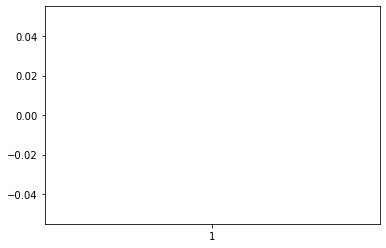

HAHORA


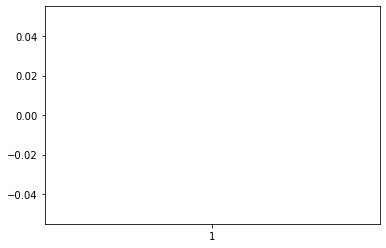

AREAPOV


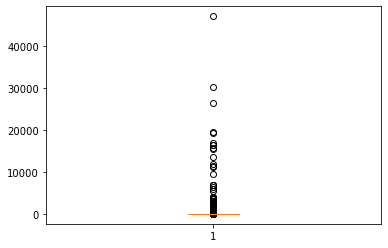

AREAMATO


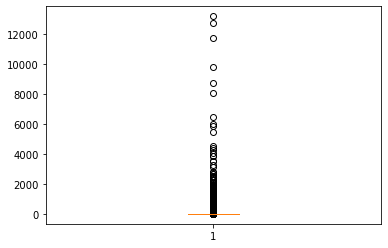

AREAAGRIC


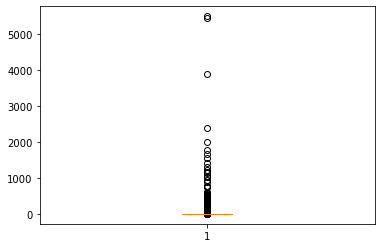

AREATOTAL


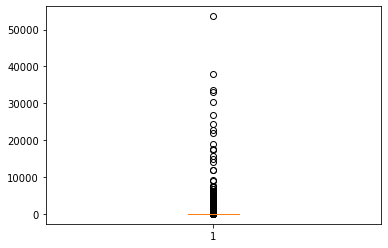

In [7]:
for i in ['DURACAO','HAHORA', 'AREAPOV', 'AREAMATO', 'AREAAGRIC', 'AREATOTAL']:
    print(i)
    plt.boxplot(dataset[i])
    plt.show()

We know that ha burned by hour (HAHORA) is duration(DURACAO)/total area burned (AREATOTAL). So first of all lets check for nan's, as this columns have to possibly be discarded

In [8]:
# No nan's here
dataset['AREATOTAL'].isna().sum()

0

Let's recompute the total area just to be sure

In [9]:
dataset['AREATOTAL'] = dataset['AREAPOV']+dataset['AREAMATO']+dataset['AREAAGRIC']
dataset['AREATOTAL'].describe()

# All good here

count    143131.000000
mean          9.106358
std         305.132385
min           0.000000
25%           0.010000
50%           0.055000
75%           0.500000
max       53618.811555
Name: AREATOTAL, dtype: float64

Let's check if we have nan durations and begin and end nan dates

In [10]:
display(dataset['DURACAO'].isna().sum())
display(dataset['DHFIM'].isna().sum())
display(dataset['DHINICIO'].isna().sum())

383

383

0

We have precisely the same number of duration and end date nan's lets check whats happening

In [11]:
dataset[dataset['DURACAO'].isna()]

,LAT,LON,ANO,TIPO,DISTRITO,CONCELHO,FREGUESIA,DHINICIO,DHFIM,DURACAO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,HAHORA,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,TIPOCAUSA,HUMIDADERELATIVA,VENTOINTENSIDADE,PRECEPITACAO,FFMC,DMC,DC,ISI,FWI,THC,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
113,41.439564,-7.483422,2013,Florestal,Vila Real,Murça,Valongo de Milhais,2013-02-26 13:19:00,NaT,NaN,0.040,0.000,0.0,0.040,0,NaN,0,0,1,0,0,Negligente,50.0,3.0,0.0,74.300003,4.000000,244.899994,0.900000,0.400000,29.374001,628.9000,16.56850,149.4730,21.02
179,41.206040,-8.291547,2013,Florestal,Porto,Penafiel,Penafiel,2013-02-03 19:10:00,NaT,NaN,0.000,0.010,0.0,0.010,0,NaN,0,0,1,0,0,Negligente,40.0,7.0,0.0,87.699997,7.400000,12.700000,4.400000,4.000000,13.300000,236.2880,11.47780,317.3160,22.75
400,41.133060,-8.109440,2013,Florestal,Porto,Baião,Mesquinhata,2013-04-15 17:15:00,NaT,NaN,0.000,0.030,0.0,0.030,0,NaN,0,0,1,0,0,Desconhecida,64.0,7.0,0.0,86.500000,16.700001,48.700001,3.700000,5.600000,14.619200,266.7880,26.87170,199.1940,19.47
587,39.055000,-8.965556,2013,Agrícola,Lisboa,Alenquer,Alenquer (Triana),2013-04-20 20:51:00,NaT,NaN,0.000,0.000,0.5,0.500,0,NaN,0,0,0,0,1,Desconhecida,51.0,18.0,0.0,87.500000,23.000000,106.000000,7.400000,13.600000,13.518400,13.9894,5.49468,417.7740,16.43
591,41.576419,-7.483254,2013,Florestal,Vila Real,Valpaços,São João da Corveira,2013-04-20 18:00:00,NaT,NaN,0.000,1.750,0.0,1.750,0,NaN,0,0,0,1,0,Negligente,40.0,7.0,0.0,88.699997,22.600000,40.900002,5.100000,8.600000,12.217000,866.5950,12.38280,88.8185,8.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141469,41.798333,-8.392222,2022,Florestal,Viana do Castelo,Ponte da Barca,Sampriz,2022-08-20 13:28:00,NaT,NaN,0.025,0.025,0.0,0.050,1,0.050,0,0,1,0,0,Reacendimento,NaN,NaN,NaN,91.199997,78.800003,534.799988,7.170000,26.770000,NaN,481.6270,33.18810,160.2870,12.85
141495,41.854167,-8.438889,2022,Florestal,Viana do Castelo,Arcos de Valdevez,Parada,2022-08-24 13:30:00,NaT,NaN,0.015,0.000,0.0,0.015,0,0.015,0,0,1,0,0,Intencional,NaN,NaN,NaN,87.809273,133.165649,629.765625,4.255781,20.091394,NaN,50.4044,13.06390,217.0840,19.14
141591,41.800000,-8.401944,2022,Florestal,Viana do Castelo,Ponte da Barca,Vila Nova de Muia,2022-09-24 15:22:00,NaT,NaN,0.000,0.050,0.0,0.050,0,0.050,0,0,1,0,0,Intencional,NaN,NaN,NaN,87.199997,19.400000,205.699997,7.330000,13.890000,NaN,104.6050,22.68550,204.9210,14.94
141594,41.902222,-8.356667,2022,Florestal,Viana do Castelo,Arcos de Valdevez,Carralcova,2022-09-24 20:51:00,NaT,NaN,0.000,1.000,0.0,1.000,0,1.000,0,0,0,1,0,Negligente,NaN,NaN,NaN,86.599998,16.600000,203.100006,6.830000,12.270000,NaN,449.9400,22.38110,107.3270,13.84


I have noticed that some of the records have a ratio per hour of burnt area, so from there we can calculate our duration. as shown bellow.

In [12]:
dataset['DURACAO'] = np.where(dataset['DURACAO'].isna() & ~dataset['HAHORA'].isna(), dataset['AREATOTAL']/dataset['HAHORA'] ,dataset['DURACAO'])

In [13]:
display(dataset['DURACAO'].isna().sum())

326

We addressed some of the rows, but unfortunatly for our further analysis we cant use the columns that we cant calculate duration, we have to drop them.

In [14]:
dataset = dataset[~dataset['DURACAO'].isna()]

In [15]:
dataset['DURACAO'].describe()

count    142805.000000
mean         85.115584
std         369.924976
min          -5.000000
25%          27.000000
50%          45.000000
75%          80.000000
max       49359.000000
Name: DURACAO, dtype: float64

We have to recalculate all durations and if we can't make sense of them, we have to drop the meaningless columns.

In [16]:
dataset['DURACAO'] = (dataset['DHFIM'] - dataset['DHINICIO']).dt.total_seconds() / 60 / 60
dataset['DURACAO'].isna().sum()

57

We have 57 invalid durations wich means we have 57 invalid final dates. Let's check.

In [17]:
dataset[dataset['DURACAO'].isna()]

,LAT,LON,ANO,TIPO,DISTRITO,CONCELHO,FREGUESIA,DHINICIO,DHFIM,DURACAO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,HAHORA,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,TIPOCAUSA,HUMIDADERELATIVA,VENTOINTENSIDADE,PRECEPITACAO,FFMC,DMC,DC,ISI,FWI,THC,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
125608,41.790556,-7.713056,2021,Florestal,Vila Real,Montalegre,Chã,2021-03-23 19:55:00,NaT,NaN,1.000000,69.000000,0.000000,70.000000,0,70.000000,0,0,0,1,0,Intencional,91.646713,9.671956,0.0,87.599998,13.800000,28.000000,3.900000,5.040000,NaN,923.30900,9.11076,115.5130,16.50
125624,41.683611,-7.357222,2021,Florestal,Vila Real,Valpaços,Ervões,2021-03-24 19:11:00,NaT,NaN,0.000000,0.400000,0.000000,0.400000,0,0.400000,0,0,1,0,0,Negligente,66.772537,22.647295,0.0,86.400002,17.900000,37.500000,2.930000,4.410000,NaN,755.66400,14.17450,94.1571,9.10
126166,40.167887,-8.018034,2021,Agrícola,Coimbra,Góis,Colmeal,2021-04-04 15:20:00,NaT,NaN,0.000000,0.000000,0.100000,0.100000,0,0.100000,0,0,0,0,1,Negligente,51.662560,6.193266,0.0,75.475662,17.400370,54.908260,1.393566,1.925831,NaN,622.99100,41.48900,81.3736,11.65
129319,41.345833,-8.097500,2021,Florestal,Braga,Celorico de Basto,Fervença,2021-07-29 23:22:00,NaT,NaN,0.370000,0.000000,0.000000,0.370000,0,0.370000,0,0,1,0,0,Intencional,89.226555,3.822002,0.0,90.000000,91.300003,329.299988,7.260000,26.230000,NaN,305.23600,20.84440,181.1630,17.56
129421,41.016911,-8.429155,2021,Florestal,Aveiro,Santa Maria da Feira,Canedo,2021-07-31 16:49:00,NaT,NaN,5.880000,0.000000,0.000000,5.880000,0,5.880000,0,0,0,1,0,Intencional,45.907143,18.065189,0.0,89.199997,92.500000,412.600006,9.580000,32.970001,NaN,95.82250,35.50580,300.6660,13.75
130845,41.397222,-8.060000,2021,Florestal,Braga,Celorico de Basto,Infesta,2021-08-27 19:29:00,NaT,NaN,10.300000,4.200000,0.000000,14.500000,0,14.500000,0,0,0,1,0,Intencional,75.571999,12.478767,0.0,89.699997,124.699997,507.200012,6.540000,27.870001,NaN,422.00600,31.21040,172.2270,19.34
132930,40.859955,-8.258912,2022,Florestal,Aveiro,Arouca,Albergaria da Serra,2022-01-04 22:16:00,NaT,NaN,0.000000,0.545200,0.000000,0.545200,0,0.545200,0,0,1,0,0,Negligente,NaN,NaN,NaN,58.374947,9.586843,21.438032,0.477571,0.268670,NaN,807.76600,35.73500,168.4030,13.36
133061,40.792613,-8.458958,2022,Florestal,Aveiro,Oliveira de Azeméis,Palmaz,2022-01-07 16:19:00,NaT,NaN,0.000000,0.001000,0.000000,0.001000,1,0.001000,0,0,1,0,0,Reacendimento,NaN,NaN,NaN,87.800003,19.799999,209.000000,5.180000,10.640000,NaN,201.45700,23.36370,350.0930,15.98
133146,40.803220,-8.488267,2022,Florestal,Aveiro,Oliveira de Azeméis,Travanca,2022-07-15 14:40:00,NaT,NaN,0.000000,0.062300,0.000000,0.062300,0,0.062300,0,0,1,0,0,Intencional,NaN,NaN,NaN,92.553429,76.414017,436.666931,11.772620,33.984798,NaN,149.01000,14.16460,465.6290,14.81
133179,40.886095,-8.442560,2022,Florestal,Aveiro,Oliveira de Azeméis,Nogueira do Cravo,2022-07-20 17:42:00,NaT,NaN,0.000000,0.050000,0.000000,0.050000,1,0.050000,0,0,1,0,0,Reacendimento,NaN,NaN,NaN,87.500000,92.500000,381.200012,4.710000,19.900000,NaN,361.65900,26.98640,613.8780,21.61


Analysing the rows, they all have a ratio of burnt ground vs total area burned and a total area burned so we calculate this ones.

In [18]:
dataset['DURACAO'] = dataset['DURACAO'].fillna(dataset['AREATOTAL']/dataset['HAHORA'])

In [19]:
dataset['DURACAO'].describe().T

count    142805.000000
mean          3.785961
std         245.446189
min       -7774.333333
25%           0.433333
50%           0.750000
75%           1.350000
max        5888.300000
Name: DURACAO, dtype: float64

In [20]:
dataset[dataset['DURACAO']<0]

,LAT,LON,ANO,TIPO,DISTRITO,CONCELHO,FREGUESIA,DHINICIO,DHFIM,DURACAO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,HAHORA,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,TIPOCAUSA,HUMIDADERELATIVA,VENTOINTENSIDADE,PRECEPITACAO,FFMC,DMC,DC,ISI,FWI,THC,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
1143,41.850560,-8.804720,2013,Agrícola,Viana do Castelo,Caminha,Venade,2013-04-30 23:56:00,2013-01-05 00:25:00,-2783.516667,0.000000,0.000000,0.040000,0.040000,0,0.082759,0,0,0,0,1,Intencional,87.0,7.0,9.0,33.400002,22.799999,62.200001,0.000000,0.000000,107.1120,73.7838,20.99580,379.046,15.21
1144,41.987220,-8.641940,2013,Florestal,Viana do Castelo,Valença,Cerdal,2013-04-30 23:13:00,2013-01-05 00:03:00,-2783.166667,0.000000,0.015000,0.000000,0.015000,0,0.018000,0,0,1,0,0,Negligente,58.0,10.0,0.0,87.599998,41.299999,70.900002,5.000000,11.900000,13.4091,21.1525,4.56611,273.382,15.94
1145,41.910280,-8.433060,2013,Florestal,Viana do Castelo,Arcos de Valdevez,São Cosme e São Damião,2013-04-30 23:41:00,2013-01-05 00:07:00,-2783.566667,0.000000,0.005000,0.000000,0.005000,0,0.011538,0,0,1,0,0,Intencional,62.0,7.0,0.0,87.099998,47.500000,79.400002,4.000000,10.800000,13.9569,174.3040,23.43190,93.907,13.97
1613,40.630278,-7.088333,2013,Florestal,Guarda,Pinhel,Pínzio,2013-12-05 21:15:00,2013-05-13 01:10:00,-4964.083333,0.550000,2.450000,0.000000,3.000000,0,0.765957,0,0,0,1,0,Negligente,54.0,10.0,0.0,82.000000,22.000000,111.300003,2.400000,5.000000,19.7654,735.6890,9.96552,112.050,17.09
1642,41.677024,-8.123870,2013,Florestal,Braga,Vieira do Minho,Louredo,2013-12-05 21:45:00,2013-05-13 00:51:00,-4964.900000,0.000000,1.700000,0.000000,1.700000,0,0.548387,0,0,0,1,0,Negligente,39.0,3.0,0.0,86.400002,15.400000,69.199997,3.000000,4.900000,14.7301,353.9600,25.66640,123.184,18.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142323,41.778333,-7.715278,2022,Florestal,Vila Real,Montalegre,Cervos,2022-12-08 13:40:00,2022-08-13 09:20:00,-2812.333333,37.483269,74.750116,23.596188,135.829574,0,7.148925,0,0,0,1,0,Desconhecida,NaN,NaN,NaN,91.900002,166.699997,713.200012,8.420000,34.939999,NaN,912.4380,8.76604,112.401,16.05
142428,41.346070,-7.590042,2022,Florestal,Vila Real,Sabrosa,Parada de Pinhão,2022-08-31 16:39:00,2022-01-09 03:25:00,-5629.233333,32.014145,0.000000,0.043931,32.058076,0,3.205808,0,0,0,1,0,Intencional,NaN,NaN,NaN,91.011261,268.793884,939.917053,7.691860,33.474602,NaN,644.7270,12.30060,143.435,19.06
142560,40.918889,-7.824444,2022,Florestal,Viseu,Vila Nova de Paiva,Pendilhe,2022-01-31 21:02:00,2022-01-02 00:51:00,-716.183333,0.000000,7.200000,0.000000,7.200000,0,2.400000,0,0,0,1,0,Negligente,NaN,NaN,NaN,87.069595,10.777727,37.295921,4.407567,5.143467,NaN,779.9650,11.47120,161.632,14.59
142877,41.033611,-8.078056,2022,Florestal,Viseu,Cinfães,Tendais,2022-12-07 21:13:00,2022-07-13 14:56:00,-3534.283333,3.567500,10.586100,0.000000,14.153600,0,0.832565,0,0,0,1,0,Intencional,NaN,NaN,NaN,93.599998,52.299999,307.600006,9.590000,26.240000,NaN,851.5340,31.57230,149.879,14.56


Again a problem with negative dates, We are going to calculate again with operation dividing the ratio by the total area burnt

In [21]:
dataset['DURACAO'] = np.where(dataset['DURACAO']<0, dataset['AREATOTAL']/dataset['HAHORA'], dataset['DURACAO'])

We just have to fill the final dates with the start dates + hours

In [22]:
dataset['DHFIM'] = dataset['DHINICIO'] + pd.to_timedelta(dataset['DURACAO'], unit = 'h')

In [23]:
dataset.head(3)

,LAT,LON,ANO,TIPO,DISTRITO,CONCELHO,FREGUESIA,DHINICIO,DHFIM,DURACAO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,HAHORA,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,TIPOCAUSA,HUMIDADERELATIVA,VENTOINTENSIDADE,PRECEPITACAO,FFMC,DMC,DC,ISI,FWI,THC,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
0,40.330172,-8.222549,2013,Florestal,Coimbra,Penacova,Oliveira do Mondego,2013-03-01 17:54:00,2013-03-01 18:28:59.999998800,0.583333,0.0,0.001,0.0,0.001,0,0.001714,0,0,1,0,0,Intencional,54.0,14.0,0.0,76.300003,2.2,35.200001,1.7,0.7,26.773500,99.8913,17.5053,120.767,22.49
1,40.127576,-8.153059,2013,Florestal,Coimbra,Góis,Góis,2013-04-01 23:56:00,2013-05-01 01:39:59.999998800,697.733333,0.0,0.001,0.0,0.001,0,0.000577,0,0,1,0,0,Negligente,41.0,10.0,0.0,85.400002,2.9,47.400002,3.7,2.6,15.847600,597.4790,49.9571,183.455,21.73
2,40.236057,-7.794691,2013,Florestal,Coimbra,Arganil,Piódão,2013-04-01 13:09:00,2013-04-01 14:30:00.000000000,1.350000,0.0,0.050,0.0,0.050,0,0.037037,0,0,1,0,0,Negligente,51.0,28.0,0.0,81.099998,1.7,25.000000,5.3,3.2,20.834101,748.7660,50.4426,224.046,11.95


We still have 5 nan duration and end dates that are nan, we are going to drop them.

In [24]:
dataset[dataset['DURACAO'].isna()]

,LAT,LON,ANO,TIPO,DISTRITO,CONCELHO,FREGUESIA,DHINICIO,DHFIM,DURACAO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,HAHORA,QUEIMADA,FALSOALARME,FOGACHO,INCENDIO,AGRICOLA,TIPOCAUSA,HUMIDADERELATIVA,VENTOINTENSIDADE,PRECEPITACAO,FFMC,DMC,DC,ISI,FWI,THC,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
113241,39.180236,-9.079732,2019,Florestal,Lisboa,Cadaval,Vilar,2019-12-09 17:37:00,NaT,NaN,0.0,0.0,0.0,0.0,0,0.0,0,0,1,0,0,NaN,31.427505,20.23826,0.0,94.037186,170.632721,1057.079468,19.155760,58.123363,NaN,385.0770,39.8005,202.590,15.72
133115,40.637990,-8.347085,2022,Florestal,Aveiro,Águeda,Préstimo,2022-12-07 13:55:00,NaT,NaN,0.0,0.0,0.0,0.0,0,0.0,0,0,1,0,0,NaN,NaN,NaN,NaN,95.800003,67.199997,316.600006,14.820000,38.389999,NaN,83.4362,14.6760,446.113,21.26
136663,39.746180,-8.442470,2022,Florestal,Leiria,Alvaiázere,Pelmá,2022-12-07 16:11:00,NaT,NaN,0.0,0.0,0.0,0.0,0,0.0,0,0,1,0,0,NaN,NaN,NaN,NaN,98.199997,112.599998,580.200012,34.770000,79.769997,NaN,134.8490,18.7312,218.640,23.08
136664,39.887220,-8.479300,2022,Florestal,Leiria,Pombal,Abiul,2022-12-07 16:24:00,NaT,NaN,0.0,0.0,0.0,0.0,0,0.0,0,0,1,0,0,NaN,NaN,NaN,NaN,97.599998,103.500000,512.700012,27.639999,67.800003,NaN,194.8370,11.0305,221.195,23.45
136665,39.903500,-8.498300,2022,Florestal,Leiria,Pombal,Abiul,2022-12-07 16:39:00,NaT,NaN,0.0,0.0,0.0,0.0,0,0.0,0,0,1,0,0,NaN,NaN,NaN,NaN,97.599998,103.500000,512.700012,27.639999,67.800003,NaN,250.9660,11.8323,186.096,31.60


In [25]:
final_dataset = dataset[~dataset['DURACAO'].isna()]

#### Renaming columns, I will translate all columns now to english, and lowercase them

In [26]:
final_dataset.columns

Index(['LAT', 'LON', 'ANO', 'TIPO', 'DISTRITO', 'CONCELHO', 'FREGUESIA',
       'DHINICIO', 'DHFIM', 'DURACAO', 'AREAPOV', 'AREAMATO', 'AREAAGRIC',
       'AREATOTAL', 'REACENDIMENTOS', 'HAHORA', 'QUEIMADA', 'FALSOALARME',
       'FOGACHO', 'INCENDIO', 'AGRICOLA', 'TIPOCAUSA', 'HUMIDADERELATIVA',
       'VENTOINTENSIDADE', 'PRECEPITACAO', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'THC', 'ALTITUDEMEDIA', 'DECLIVEMEDIO', 'DENDIDADERV',
       'COSN5VARIEDADE'],
      dtype='object')

In [27]:
final_dataset.columns = ['lat', 'lon','year','type','district','county','parish','alert_date','extinction_date','duration',
    'area_populated','area_bush','area_agricultural','area_total','reignition', 'hour_ha', 'burned','false_alarm','spark',
    'fire','agricultural','type_cause', 'relative_humidity','wind_intensity', 'precipitation', 'ffmc', 'dmc', 'dc', 'isi', 
    'fwi','thc', 'avg_altitude', 'avg_inclination', 'rvdendity','cosn5variety']


In [28]:
final_dataset.head()

,lat,lon,year,type,district,county,parish,alert_date,extinction_date,duration,area_populated,area_bush,area_agricultural,area_total,reignition,hour_ha,burned,false_alarm,spark,fire,agricultural,type_cause,relative_humidity,wind_intensity,precipitation,ffmc,dmc,dc,isi,fwi,thc,avg_altitude,avg_inclination,rvdendity,cosn5variety
0,40.330172,-8.222549,2013,Florestal,Coimbra,Penacova,Oliveira do Mondego,2013-03-01 17:54:00,2013-03-01 18:28:59.999998800,0.583333,0.0,0.001,0.0,0.001,0,0.001714,0,0,1,0,0,Intencional,54.0,14.0,0.0,76.300003,2.2,35.200001,1.7,0.7,26.773500,99.8913,17.5053,120.767,22.49
1,40.127576,-8.153059,2013,Florestal,Coimbra,Góis,Góis,2013-04-01 23:56:00,2013-05-01 01:39:59.999998800,697.733333,0.0,0.001,0.0,0.001,0,0.000577,0,0,1,0,0,Negligente,41.0,10.0,0.0,85.400002,2.9,47.400002,3.7,2.6,15.847600,597.4790,49.9571,183.455,21.73
2,40.236057,-7.794691,2013,Florestal,Coimbra,Arganil,Piódão,2013-04-01 13:09:00,2013-04-01 14:30:00.000000000,1.350000,0.0,0.050,0.0,0.050,0,0.037037,0,0,1,0,0,Negligente,51.0,28.0,0.0,81.099998,1.7,25.000000,5.3,3.2,20.834101,748.7660,50.4426,224.046,11.95
3,39.896117,-8.162342,2013,Florestal,Leiria,Pedrógão Grande,Pedrógão Grande,2013-04-01 13:13:00,2013-04-01 13:53:00.000001200,0.666667,0.1,0.100,0.0,0.200,0,0.300000,0,0,1,0,0,Negligente,51.0,28.0,0.0,81.099998,1.7,25.000000,5.3,3.2,20.834101,343.0810,10.0806,138.011,18.89
4,39.549428,-8.768329,2013,Agrícola,Leiria,Porto de Mós,Alvados,2013-04-01 12:00:00,2013-04-01 15:07:59.999998800,3.133333,0.0,0.000,6.5,6.500,0,2.074468,0,0,0,0,1,Negligente,42.0,14.0,0.0,85.800003,4.0,40.200001,4.8,4.1,15.398800,264.8890,11.7616,261.708,15.32


In [29]:
final_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,142800.0,40.479532,1.213758,0.000000,39.488333,41.033601,41.353437,65.243330
lon,142800.0,-8.283820,0.576866,-51.853745,-8.605477,-8.356951,-7.968331,-0.000000
year,142800.0,2016.745798,2.776449,2013.000000,2015.000000,2017.000000,2019.000000,2022.000000
duration,142800.0,15.291980,106.576422,0.000000,0.450000,0.766667,1.350000,5888.300000
area_populated,142800.0,4.574534,224.481027,0.000000,0.000000,0.000000,0.000000,47215.433221
area_bush,142800.0,3.882413,94.641489,0.000000,0.000000,0.010000,0.129775,13178.860000
area_agricultural,142800.0,0.661383,28.715220,0.000000,0.000000,0.000000,0.000000,5493.424200
area_total,142800.0,9.118330,305.484452,0.000000,0.010000,0.055000,0.500000,53618.811555
reignition,142800.0,0.069825,0.254853,0.000000,0.000000,0.000000,0.000000,1.000000
hour_ha,142800.0,1.074623,21.208895,0.000000,0.018375,0.088889,0.454545,6902.792308


#### We can't have negative precipitation so we will set the negatives to 0

In [30]:
final_dataset['precipitation'] = np.where(final_dataset['precipitation'] < 0, 0, final_dataset['precipitation']) 

#### Adding the CO2 expelled to the atmosphere for each fire

In [31]:
final_dataset['co2_generated'] = (final_dataset['area_populated']*1.28+final_dataset['area_bush']*14+final_dataset['area_agricultural']*1.28)*1.7264    

### Making some typing corrections to district, county and parish columns so the data is all unified.

I noted before that some locals have upper and downcase issues, I'll address them now

In [32]:
for element in ['district', 'county', 'parish']:
    final_dataset[element] = final_dataset[element].str.replace(" Da ",' da ')
    final_dataset[element] = final_dataset[element].str.replace(" De ",' de ')
    final_dataset[element] = final_dataset[element].str.replace(" Do ",' do ')

### Checking for final Nans

In [33]:
final_dataset.isna().sum()

lat                      0
lon                      0
year                     0
type                     0
district                 0
county                   0
parish                   0
alert_date               0
extinction_date          0
duration                 0
area_populated           0
area_bush                0
area_agricultural        0
area_total               0
reignition               0
hour_ha                  0
burned                   0
false_alarm              0
spark                    0
fire                     0
agricultural             0
type_cause           23177
relative_humidity    19879
wind_intensity       19902
precipitation        19879
ffmc                  1514
dmc                   1485
dc                    1485
isi                   1514
fwi                   1485
thc                  49799
avg_altitude            53
avg_inclination         53
rvdendity               25
cosn5variety            23
co2_generated            0
dtype: int64

In [34]:
# I have no option than dropping the column thc and the rows were relative humidity, wind intensity and precipitation are null 
# because for the model i want to build this is essencial info.
final_dataset = final_dataset.dropna(subset=['relative_humidity', 'hour_ha', 'avg_altitude'])
final_dataset = final_dataset.drop(['thc'], axis=1)

# Droping a few more invalid rows
final_dataset = final_dataset[~final_dataset['isi'].isna()]
final_dataset = final_dataset[~final_dataset['wind_intensity'].isna()]

#### I will assign every null of type_cause to unknown because they are in fact, unknown and translate every value to an english translated one for better understanding.

In [35]:
final_dataset['type_cause'][final_dataset['type_cause'].isna()] = 'Desconhecida'
final_dataset['type_cause'] = final_dataset['type_cause'].map({"Desconhecida" : 'Unknown', "Negligente" : 'Negligence', "Intencional" : 'Intentional', "Reacendimento" : 'Re-ignition', 'Natural' : 'Natural'})   
final_dataset['type_cause'].value_counts() 

Unknown        57593
Negligence     35030
Intentional    20061
Re-ignition     9185
Natural          951
Name: type_cause, dtype: int64

In [36]:
final_dataset['type_cause'].isna().sum()

0

In [37]:
final_dataset.head(2)

,lat,lon,year,type,district,county,parish,alert_date,extinction_date,duration,area_populated,area_bush,area_agricultural,area_total,reignition,hour_ha,burned,false_alarm,spark,fire,agricultural,type_cause,relative_humidity,wind_intensity,precipitation,ffmc,dmc,dc,isi,fwi,avg_altitude,avg_inclination,rvdendity,cosn5variety,co2_generated
0,40.330172,-8.222549,2013,Florestal,Coimbra,Penacova,Oliveira do Mondego,2013-03-01 17:54:00,2013-03-01 18:28:59.999998800,0.583333,0.0,0.001,0.0,0.001,0,0.001714,0,0,1,0,0,Intentional,54.0,14.0,0.0,76.300003,2.2,35.200001,1.7,0.7,99.8913,17.5053,120.767,22.49,0.02417
1,40.127576,-8.153059,2013,Florestal,Coimbra,Góis,Góis,2013-04-01 23:56:00,2013-05-01 01:39:59.999998800,697.733333,0.0,0.001,0.0,0.001,0,0.000577,0,0,1,0,0,Negligence,41.0,10.0,0.0,85.400002,2.9,47.400002,3.7,2.6,597.4790,49.9571,183.455,21.73,0.02417


In [38]:
final_dataset['parish'][final_dataset['district']=='Viana do Castelo'].value_counts()

Gandra                           152
Lavradas                         132
Portela                          125
Refóios do Lima                  118
Carvoeiro                        110
                                ... 
Caminha                            1
Arcos de Valdevez (são Paio)       1
Padreiro (salvador)                1
Arga de Cima                       1
Viana do Castelo (Monserrate)      1
Name: parish, Length: 310, dtype: int64

#### The parish's inside brackets are essencially lke north and south of the same place so I will remove all brackets and everything inside them effectivly grouping the fires of this small sub-parish's

In [39]:
words = list(final_dataset['parish'][final_dataset['parish'].str.contains("\(.*?\)")].unique())
file_lst_trimmed = [re.sub(r' \(.*?\)', '', file) for file in words]

final_dataset[final_dataset['parish'].isin(file_lst_trimmed)]
final_dataset['parish'] = [re.sub(r' \(.*?\)', '', file) for file in final_dataset['parish']]

### Exporting the new trimmed and treated dataset to csv and our MySQL database for later access and use

In [40]:
final_dataset.to_csv('Full fires 2013-2022 with weather to model.csv')

In [41]:
import getpass
from sqlalchemy import create_engine

password = getpass.getpass()

········


In [42]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/fire_db'
engine = create_engine(connection_string)

final_dataset.to_sql('fires_clean',con=engine,index=False,if_exists='replace')

122820